In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##  <font color = 'red'> **Dataset 1: FUEL CONSUMPTION** </font>

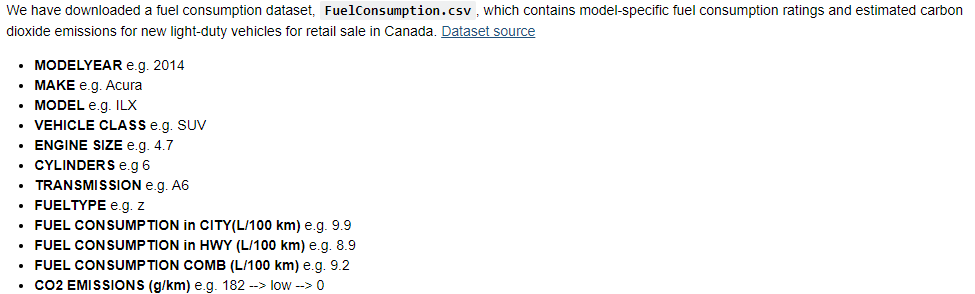

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-03-07 09:33:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   130KB/s    in 0.5s    

2024-03-07 09:33:23 (130 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## **STEP 0: DATA EXPLORATION**

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


/home/dsc1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


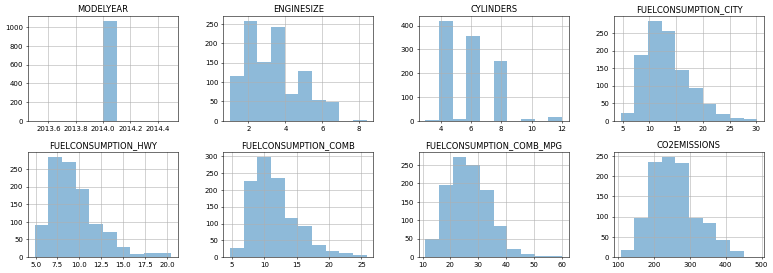

In [4]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50);
df.hist(ax=ax, layout=(3,4), alpha=0.5);

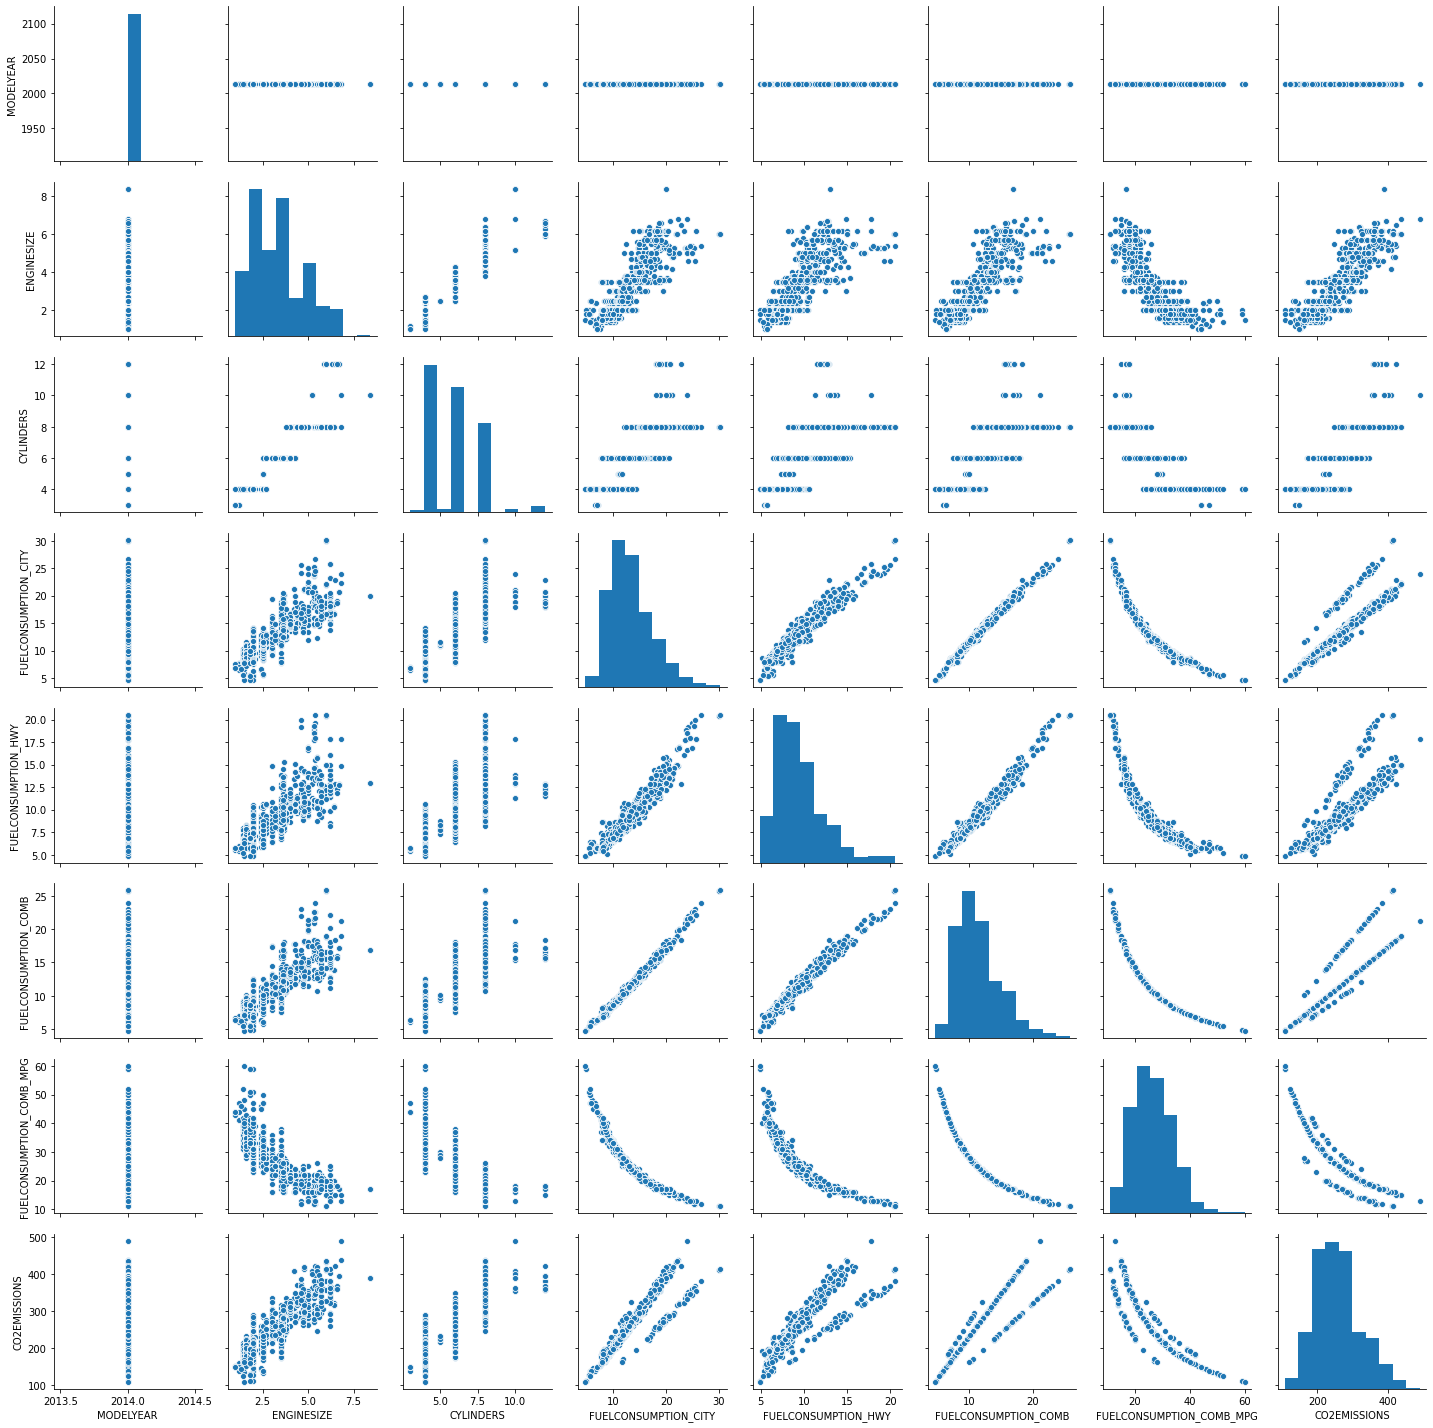

In [5]:
sns.pairplot(df)

<AxesSubplot:>

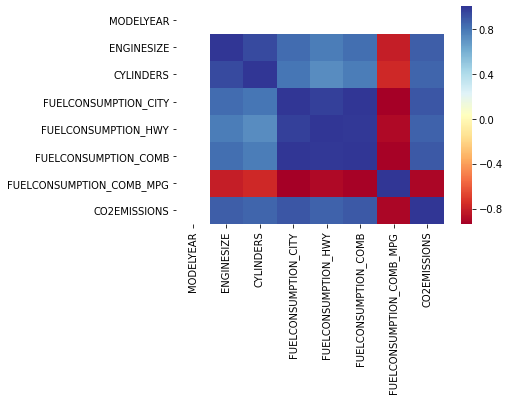

In [6]:
sns.heatmap(df.corr(), cmap='RdYlBu')

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

**1. Determing null values**

In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

**2. Determining Outliers**

<AxesSubplot:>

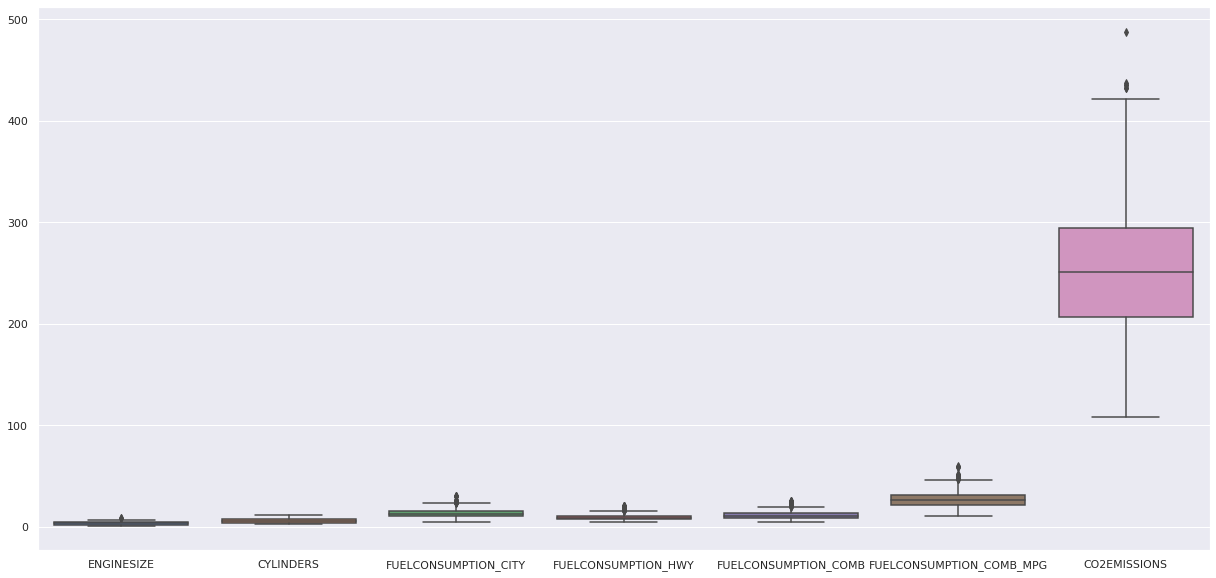

In [8]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,1:])

<AxesSubplot:>

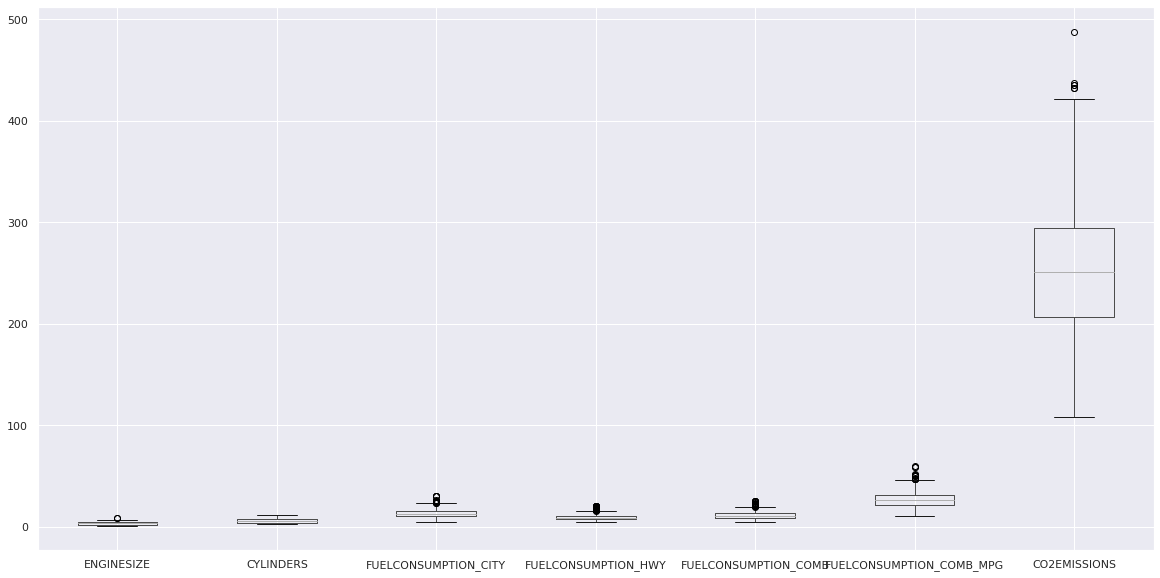

In [9]:
df.iloc[:,1:].boxplot(figsize=(20,10))

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [10]:
features = ['ENGINESIZE']
# features =  ['ENGINESIZE', 'FUELCONSUMPTION_COMB']
X = df[features].values
Y = df['CO2EMISSIONS'].values


**FEATURE SCALING/ Standardization/ Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Mean and Standard Deviation Before")
print(X.mean(), X.std())

#**********************************************
##### TO DO: Standardize X part [feature wise scaling!!!!!]
##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
#**********************************************
sc=StandardScaler()
XScaled=sc.fit_transform(X)

print("Mean and Standard Deviation After")
print(XScaled.mean(), XScaled.std())

Mean and Standard Deviation Before
3.346298031865042 1.4152314024298263
Mean and Standard Deviation After
2.6637028519591385e-17 1.0


**Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split

#***************************************************************
######### SPLIT THE X AND Y into trainining and test partitions with 80%-20%split
#<Hint: Fix a random state so that same partition is generated everytime>
#****************************************************************

X_train,X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.2, random_state=51)

print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)

Dimensions of Original Data:
Size(X): (1067, 1) ; Size(Y) (1067,)
Dimensions of Training Data:
Size(X_train): (853, 1) ; Size(Y_train) (853,)
Dimensions of Test Data:
Size(X_test): (214, 1) ; Size(Y_test) (214,)


#### HELP MODULE [NORMALIZATION!!!]

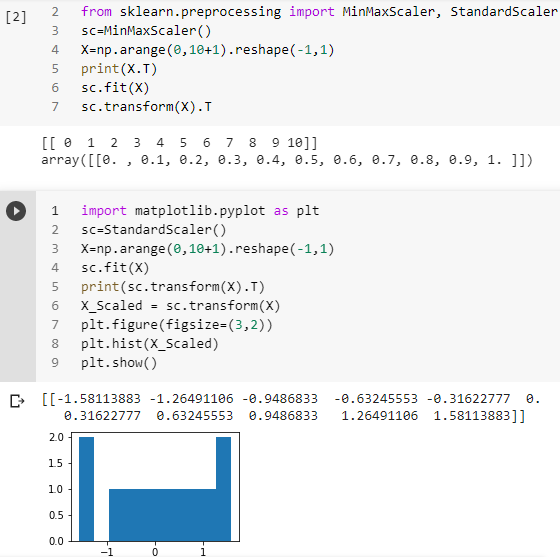

## **STEP 3: FITTING LINEAR REGRESSION MODEL ON TRAINING DATA**

### <font color='red'>**3.1 UNIVARIATE LINEAR REGRESSION**</font>

In [13]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

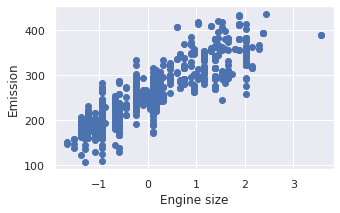

In [14]:
X = X_train[:,0]
Y = Y_train
sns.set(rc={'figure.figsize':(5,3)})
plt.scatter(x = X, y = Y)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'>**A. ESTIMATING PARAMETERS USING ORDINARY LEAST SQUARE METHOD**:</font>
   
    Y_PRED = WX + B

    W = summation(x_i-x_mean)(y_i-y_mean) / summation(x_i-x_mean)^2
    B = y_mean - W*x_mean

In [15]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
# W = ????   #REGRESSION_COEFFICIENT
# B = ?????    #INTERCEPT
W = (np.mean(X*Y)- np.mean(X)*np.mean(X)) / np.mean(X**2) -(np.mean(X))**2
B = Y_mean - W*X_mean
print("Weight/Slope W:", W)
print("Bias/Intercept B:", B)

Weight/Slope W: 58.046365171325526
Bias/Intercept B: 255.88997002308056


Mean Squared Error (MSE): 969.58
Root Mean Squared Error(RMSE): 31.14
R squared error (R2): 0.71


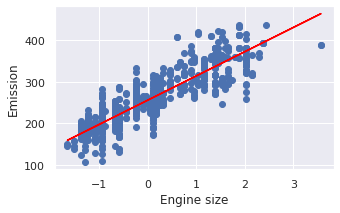

In [16]:
from sklearn import metrics
Y_PRED = np.dot(W,X) + B
# REGRESSION EVALUATION METRICS!!!
print("Mean Squared Error (MSE): %.2f" % np.mean((Y_PRED - Y) ** 2))# metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error(RMSE): %.2f" % np.sqrt(np.mean((Y_PRED - Y) ** 2)))
print('R squared error (R2): %.2f' % metrics.r2_score(Y_PRED, Y))
#R-squared is not error, but is a popular metric for accuracy of your model.
#It represents how close the data are to the fitted regression line.
#The higher the R-squared, the better the model fits your data. Best possible score is 1.0
plt.scatter(x = X, y = Y)
plt.plot(X, Y_PRED, color  = "red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'> **B. NORMAL EQUATION METHOD** </font>

$W = (X^TX)^{−1} X^TY$


In [17]:
##### TO DO
##### 1. FIND PARAMETERS W AND B
##### The values should match the ones obtained above
from numpy.linalg import inv as LA
use= np.ones([X_train.shape[0],X_train.shape[1]])
print(use)
p=np.append(use,X_train,axis=1)
p
XT=np.transpose(p)
XTX=XT.dot(p)
inv=np.linalg.inv(XTX)
inv_XT=inv.dot(XT)
W=inv_XT.dot(Y_train)

print(W)
# X_transpose = X.T  
# print(X.T)
# W= inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)  
print("Weight/Slope W:", W[1])
print("Bias/Intercept B:", W[0])

##### 2. Find value of Regression Evaluation Metrics: MSE, RMSE, R2
##### 3. Plot the data and regression line


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

<font color='blue'> **C. GRADIENT DESCENT METHOD** </font>

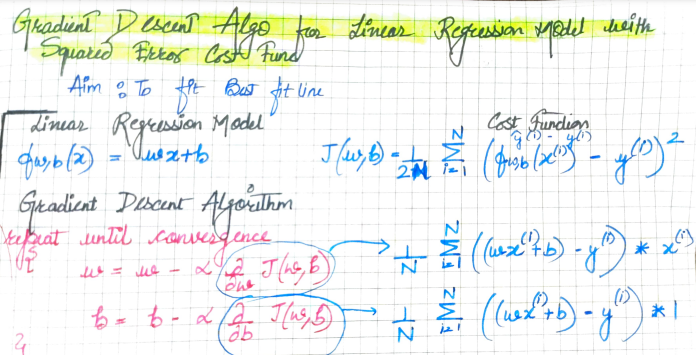

**Case 1: Using very low learning rate, say alpha=0.0001**

In [26]:
# def computeCost(X, Y, w, b):
#     #### Compute cost J
#     return J

# def gradientDescent (X, Y, learningRate, numIterations):
#     w, b = 0, 0
#     errorList =[] ### Store cost in each iteration
#     for i in range(numIterations):
#         Y_pred = #COMPUTE f(X)
#         ### compute updated w and b
#         costJ = computeCost(X, Y, w, b)
#         errorList.appen(costJ)
X=df['ENGINESIZE']
Y=df['CO2EMISSIONS']
Y=np.array(Y)
N=float(len(Y))
def computeCost(X, Y, w, b):
    J=sum([d**2 for d in (Y-(w*X+b))])/N
    return J

def gradientDescent (X, Y, learningRate, numIterations, w = 0, b = 0):

    errorList = pd.DataFrame(columns=['W','B','Cost']) ### Store cost in each iteration
    for i in range(numIterations):
        Y_pred = w*X+b
        m=(-2/N)*(sum(Y-Y_pred)*X)
        n=(-2/N)*(sum(Y-Y_pred))
        w=w-learningRate*m
        b=b-learningRate*n
        ### compute updated w and b
        costJ = computeCost(X, Y, w, b)
        errorList.loc[i]=[w,b,costJ]
    return errorList


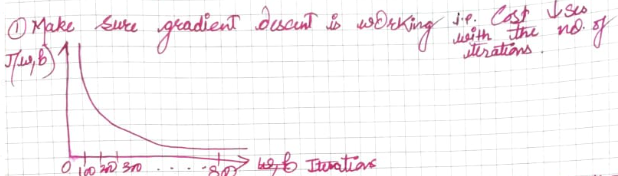

<AxesSubplot:xlabel='index'>

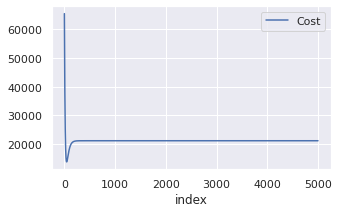

In [19]:
# w,b,errorList = gradientDescent (X, Y, 0.001, numIterations=5000)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error
g=gradientDescent (X, Y, 0.001, numIterations=5000)
g.reset_index().plot.line(x='index',y=['Cost'])


**Case 2: Using very low learning rate, say alpha=0.1**

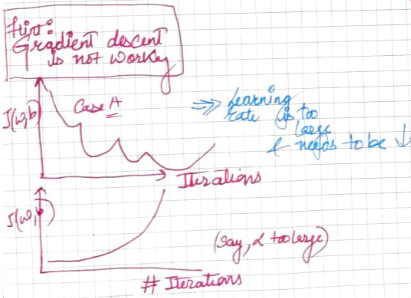

<AxesSubplot:xlabel='index'>

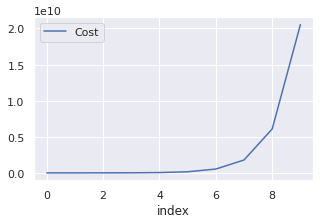

In [20]:
# w,b,errorList = gradientDescent (X, Y, 0.1, numIterations=10)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error
h= gradientDescent (X, Y, 0.1, numIterations=10)
h.reset_index().plot.line(x='index',y=['Cost'])

### <font color='red'>**3.2 MULTIPLE-VARIABLE LINEAR REGRESSION: FEATURES- ['ENGINESIZE', 'FUELCONSUMPTION_COMB']**</font>

In [21]:
features =  ['ENGINESIZE', 'FUELCONSUMPTION_COMB']
X = df[features].values
Y = df['CO2EMISSIONS'].values
from sklearn.preprocessing import MinMaxScaler, StandardScaler

src=StandardScaler()
Xscaled=sc.fit_transform(X)
Y=Y.reshape(1067,1)
one= np.ones([Xscaled.shape[0],Xscaled.shape[1]-1])
p=np.append(one,Xscaled,axis=1)
display(p)
# X = X_train
# Y = Y_train
# Y=Y.reshape(1067,1)
print(X.shape, Y.shape)

array([[ 1.        , -0.9512918 , -0.88430407],
       [ 1.        , -0.66865251, -0.5685715 ],
       [ 1.        , -1.30459092, -1.63058106],
       ...,
       [ 1.        , -0.24469358,  0.06289365],
       [ 1.        , -0.10337393, -0.08062116],
       [ 1.        , -0.10337393,  0.34992326]])

(1067, 2) (1067, 1)


<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING B PART: NORMAL EQUATION METHOD FOR X_train:** </font>

In [22]:
##### TO DO
from numpy.linalg import inv as LA
XT=np.transpose(p)
XTX=XT.dot(p)
inv=np.linalg.inv(XTX)
inv_XT=inv.dot(XT)
W=inv_XT.dot(Y)

print(W)


[[256.22867854]
 [ 27.59175268]
 [ 33.89879703]]


<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING C PART: GRADIENT DESCENT METHOD FOR X_train:** </font>

In [23]:
##### TO DO

*Optional: Try if you can come up with predicted equation represented through plane and points referring to dataset [Reference: Ankit]*
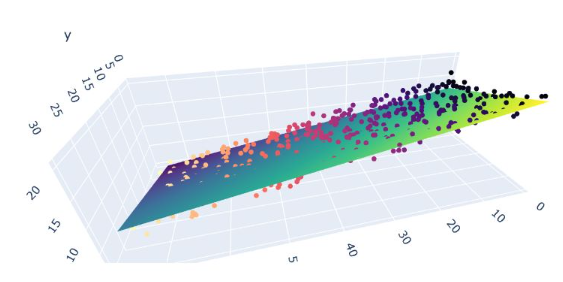

### <font color='red'>**3.3 LINEAR REGRESSION USING PRE-DEFINED LinearRegression Class**</font>

In [24]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train,Y_train)

/home/dsc1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/dsc1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print("Weight/Slope W [W1, W2]:", LRModel.coef_)
print("Bias/Intercept B:", LRModel.intercept_)
coeff_df = pd.DataFrame(LRModel.coef_,df[features].columns,columns=['Coefficient'])
coeff_df


Weight/Slope W [W1, W2]: [54.82189158]
Bias/Intercept B: 255.93085789568457


ValueError: Shape of passed values is (1, 1), indices imply (2, 1)

## **STEP 4:Evaluating Performance of Model**

In [ ]:
Y_pred = LRModel.predict(X_test)
plt.scatter(Y_test,Y_pred)

<font color='blue'>**PERFORMANCE ON TEST PARTITION**</font>

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))